## Decision Tree with Breast Cancer Dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.937


## Pre-pruning the tree

In [ ]:
tree = DecisionTreeClassifier()
tree = DecisionTreeClassifier(max_depth=4, random_state=0) 

tree.fit(X_train, y_train) 

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test))) 


Accuracy on training set: 0.988
Accuracy on test set: 0.951


## Plot Decision Tree

[Text(0.5735294117647058, 0.9, 'worst radius <= 16.795\ngini = 0.468\nsamples = 426\nvalue = [159, 267]\nclass = benign'),
 Text(0.3235294117647059, 0.7, 'worst concave points <= 0.136\ngini = 0.161\nsamples = 284\nvalue = [25, 259]\nclass = benign'),
 Text(0.17647058823529413, 0.5, 'radius error <= 1.048\ngini = 0.031\nsamples = 252\nvalue = [4, 248]\nclass = benign'),
 Text(0.11764705882352941, 0.3, 'smoothness error <= 0.003\ngini = 0.024\nsamples = 251\nvalue = [3, 248]\nclass = benign'),
 Text(0.058823529411764705, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = benign'),
 Text(0.17647058823529413, 0.1, 'gini = 0.016\nsamples = 247\nvalue = [2, 245]\nclass = benign'),
 Text(0.23529411764705882, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = malignant'),
 Text(0.47058823529411764, 0.5, 'worst texture <= 25.62\ngini = 0.451\nsamples = 32\nvalue = [21, 11]\nclass = malignant'),
 Text(0.35294117647058826, 0.3, 'worst smoothness <= 0.179\ngini = 0.375\nsamples = 12\nva

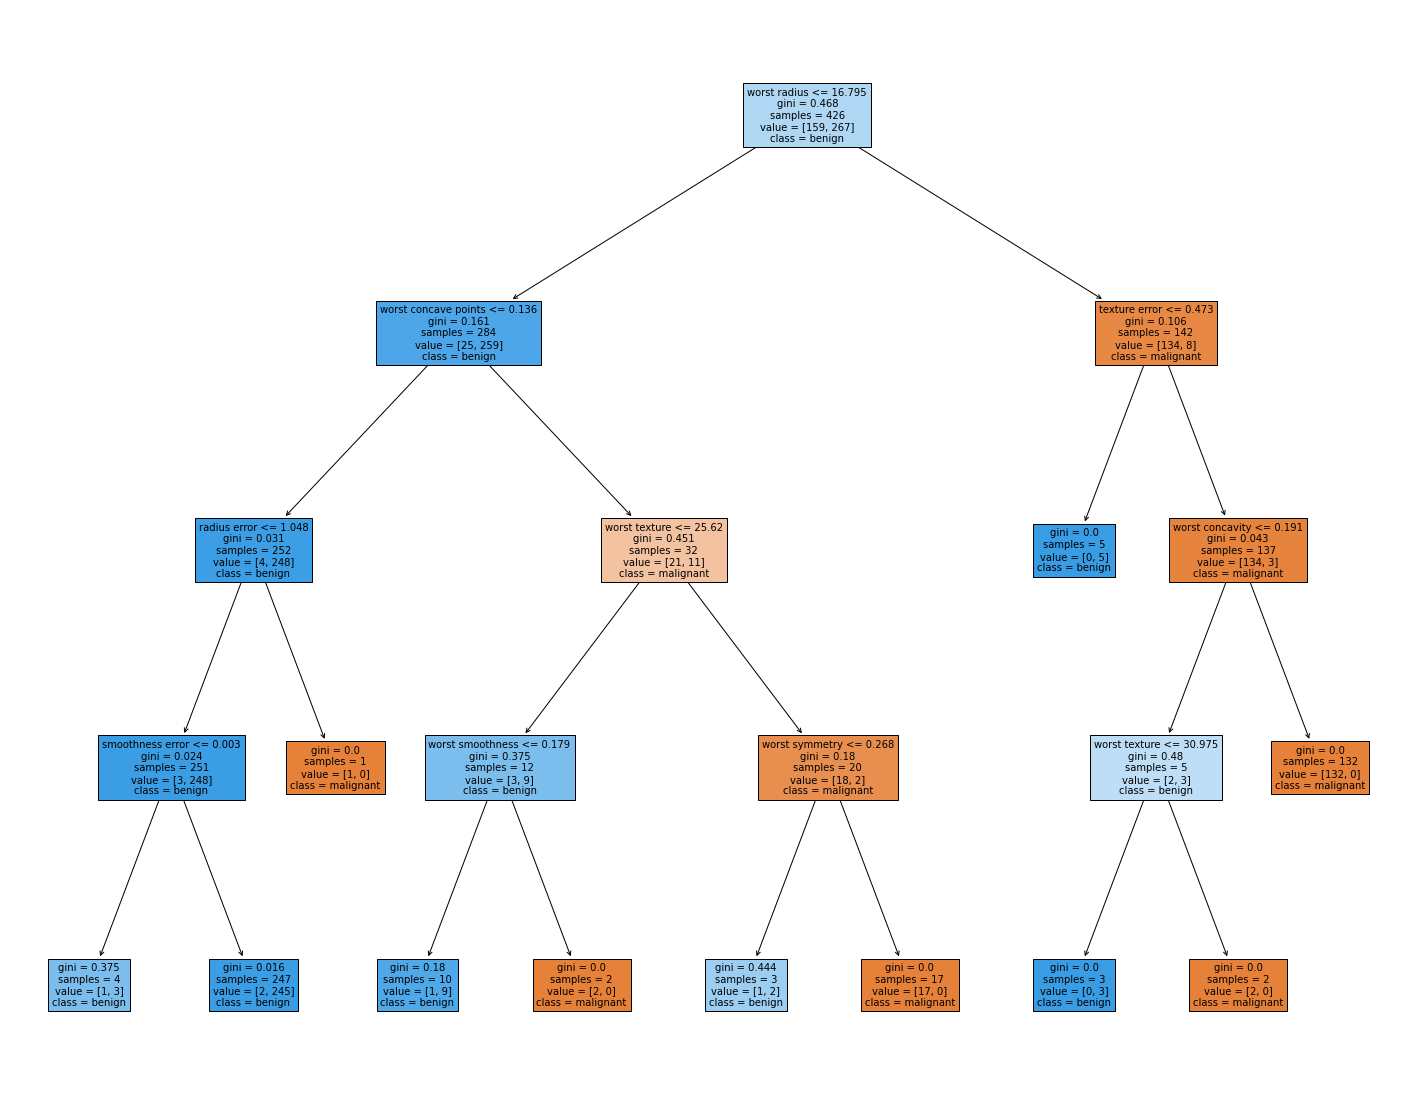

In [ ]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
plot_tree(tree, feature_names=cancer.feature_names,class_names=cancer.target_names, filled=True)


In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], 
		 feature_names=cancer.feature_names, impurity=False, filled=True) 


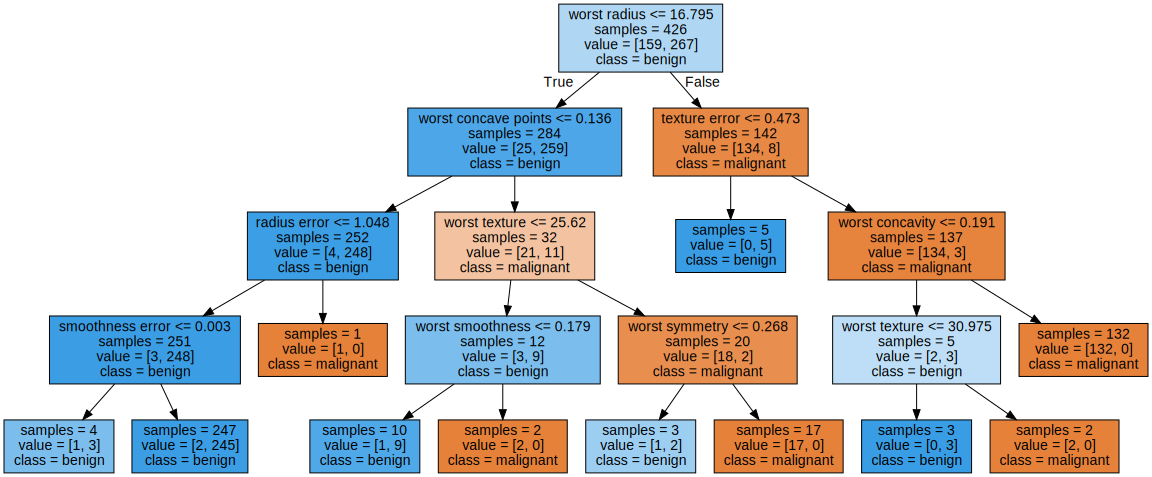

In [ ]:
import graphviz 
with open("tree.dot") as f: 
	dot_graph = f.read() 
graphviz.Source(dot_graph)

## Plot Feature Important

In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_)) 

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [ ]:
from matplotlib import pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align='center') 
  plt.yticks(np.arange(n_features), cancer.feature_names) 
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")


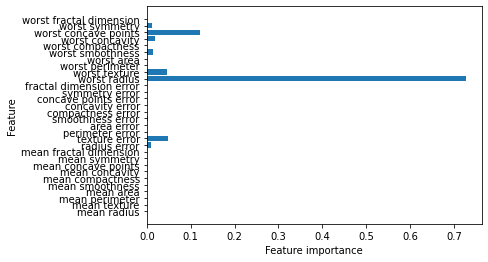

In [ ]:
plot_feature_importances_cancer(tree)

# GridSearchCV

In [ ]:
tree = DecisionTreeClassifier()
tree = DecisionTreeClassifier(max_depth=4, random_state=0) 

tree.fit(X_train, y_train) 

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test))) 


Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, 7)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid=param_grid)

grid.fit(X_train, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 7)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=Fal

In [ ]:
print(grid.best_params_)

{'max_depth': 3}


In [ ]:
print(grid.best_score_)

0.9343365253077975


In [ ]:
tree = DecisionTreeClassifier()
tree = DecisionTreeClassifier(max_depth=3, random_state=0) 

tree.fit(X_train, y_train) 

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test))) 


Accuracy on training set: 0.977
Accuracy on test set: 0.944


In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="grid.dot", class_names=["malignant", "benign"], 
		 feature_names=cancer.feature_names, impurity=False, filled=True) 


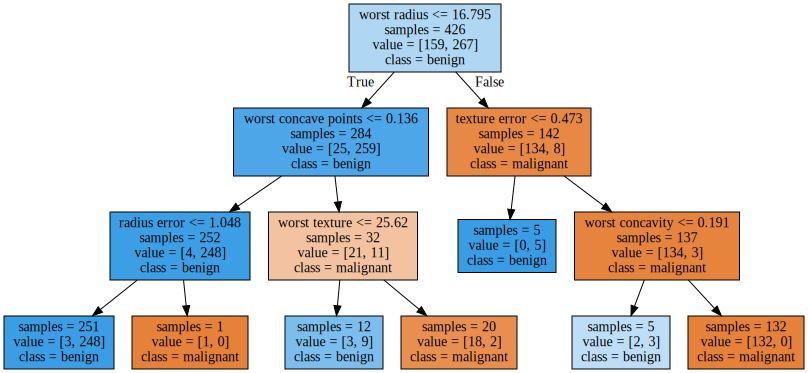

In [ ]:
import graphviz 
with open("grid.dot") as f: 
	dot_graph = f.read() 
graphviz.Source(dot_graph)